In [2]:
import numpy as np
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib.pyplot import savefig
import matplotlib.image as mgimg
from matplotlib import animation
from IPython.display import HTML
from scipy.interpolate import griddata
from matplotlib import cm
import glob
import sys

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpmath as mp
import csv

def file_reader(filename):
    with open(filename) as file:
        reader = csv.reader(file, delimiter=" ")
        data  = list(zip(*reader))
        data0 = []
        data1 = []
        data2 = []
        data3 = []
        data4 = []
        for i in range(len(data[0])):           
            data0.append(float(data[0][i]))
            data1.append(float(data[1][i]))
            data2.append(float(data[2][i]))
            data3.append(float(data[3][i]))
            data4.append(float(data[3][i]))
        return data0,data1,data2,data3,data4

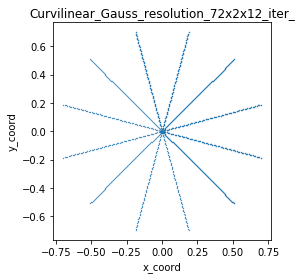

In [5]:
filename = "Curvilinear_Gauss_resolution_72x2x12_iter_"
x_iter_0,y_iter_0,z_iter_0,num_0,exact_0 = file_reader(filename+"10.txt")

x = []
y = []
z = []
num = []

for i in range(len(x_iter_0)):
#    if y_iter_0[i] != 0 :
        x.append(x_iter_0[i])
        y.append(y_iter_0[i])
        z.append(z_iter_0[i])
        num.append(num_0[i])

fig = plt.figure()
ax = fig.add_subplot(111)
plt.gca().set_aspect('equal', adjustable='box')
#ax = plt.axes(projection='3d')
ax.set_xlabel('x_coord')
ax.set_ylabel('y_coord')
#ax.set_zlabel('Numerical Soln.')
ax.set_title(filename)
#ax.scatter3D(x_iter_0,y_iter_0,num_0, c=num_0, cmap='Greens')
#ax.plot_trisurf(
#    np.array(x_iter_0),np.array(y_iter_0),np.array(num_0),  cmap=plt.get_cmap('jet'),
#    linewidth=0, antialiased=False, alpha=0.5)
ax.scatter(x,y,s=0.05)
plt.show()

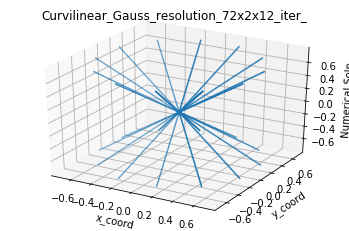

In [7]:
filename = "Curvilinear_Gauss_resolution_72x2x12_iter_"
x_iter_0,y_iter_0,z_iter_0,num_0,exact_0 = file_reader(filename+"0.txt")

x = []
y = []
z = []
num = []

for i in range(len(x_iter_0)):
    #if y_iter_0[i] != 0:
        x.append(x_iter_0[i])
        y.append(y_iter_0[i])
        z.append(z_iter_0[i])
        num.append(num_0[i])

fig = plt.figure()
#ax = plt.axes(projection='3d')
ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_xlabel('x_coord')
ax.set_ylabel('y_coord')
ax.set_zlabel('Numerical Soln.')
ax.set_title(filename)
#ax.plot_trisurf(x,y,num,cmap=cm.jet, linewidth=0)
#ax.plot_trisurf(x,y,num,cmap=cm.jet, linewidth=0)
ax.scatter3D(x,y,z,s=0.3)
#ax.scatter(x,y,num,s=0.3,cmap='hsv',c=z)
plt.show()

In [137]:
filename = "Curvilinear_Gauss_resolution_72x2x12_iter_"

itermax = 470
i = 0
while i <= itermax:
    name = filename + str(i)
    x_iter_0,y_iter_0,z_iter_0,num_0,exact_0 = file_reader(name+".txt")
    
#    y = []
#    z = []
#    num = []

#    for j in range(len(x_iter_0)):
#        if y_iter_0[j] != 0:
#            y.append(y_iter_0[j])
#            z.append(z_iter_0[j])
#            num.append(num_0[j])
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x_coord')
    ax.set_ylabel('y_coord')
    ax.set_zlabel('Numerical Soln.')
    ax.set_title(filename)
    ax.plot_trisurf(x_iter_0,y_iter_0,num_0,cmap=cm.jet, linewidth=0)
    savefig(name+"_surface.png",dpi=450)
    plt.close(fig)
    i += 10

In [138]:
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

myimages = []

i = 0
while i <= itermax:
    name = filename + str(i)
    img = mgimg.imread(name+"_surface.png")
    imgplot = plt.imshow(img)
    myimages.append([imgplot])
    i += 10

ani = animation.ArtistAnimation(fig, myimages, interval=100,  repeat_delay=1000)
plt.close()
ani.save(filename+'surface.mp4', fps=10,dpi=450)


HTML("""
    <video width="480" height="360" controls>
        <source src="Curvilinear_Gauss_resolution_72x12x2_iter_surface.mp4" type="video/mp4"> 
    </video>
""")

HTML("""
    <video width="480" height="360" controls>
        <source src="Curvilinear_Gauss_resolution_72x12x2_iter_surface2.mp4" type="video/mp4"> 
    </video>
""")

HTML("""
    <video width="480" height="360" controls>
        <source src="Curvilinear_Gauss_resolution_72x2x12_iter_surface.mp4" type="video/mp4"> 
    </video>
""")

In [96]:
HTML("""
    <video width="480" height="360" controls>
        <source src="Gauss3D_100_tmax_2dot4.mp4" type="video/mp4"> 
    </video>
""")

In [54]:
import cmdline_helper as cmd
import os
outdir = os.path.join("ScalarWave_Ccodes/")
grid = "100"

cmd.C_compile(os.path.join(outdir,"ScalarWave_Playground_Gauss.c"), "ScalarWave_Playground_Gauss")
cmd.delete_existing_files("out*.txt")
cmd.delete_existing_files("out*.png")
cmd.Execute("ScalarWave_Playground_Gauss", grid, os.path.join(outdir,"out"+grid+".txt"))

Compiling executable...
Executing `gcc -Ofast -fopenmp -march=native -funroll-loops ScalarWave_Ccodes/ScalarWave_Playground_Gauss.c -o ScalarWave_Playground_Gauss.exe -lm`...
Finished executing in 2.625955581665039 seconds.
Finished compilation.
Executing `cmd /c ScalarWave_Playground_Gauss 100`...
Finished executing in 33.57045078277588 seconds.


In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpmath as mp
import csv

def file_reader2(filename):
    with open(filename) as file:
        reader = csv.reader(file, delimiter=" ")
        data  = list(zip(*reader))
        data0 = []
        data1 = []
        data2 = []
        data3 = []
        for i in range(len(data[0])):           
            data0.append(float(data[0][i]))
            data1.append(float(data[1][i]))
            data2.append(float(data[2][i]))
            data3.append(float(data[3][i]))
        return data0,data1,data2,data3

In [59]:
tmax = 2.4
itermax = float(grid) * tmax 
i = 0
while i <= itermax:
    filename = "out2D_Gauss_resolution_"+grid+"x"+grid+"x"+grid+"__iter_"+str(i)
    x_iter_0,y_iter_0,num_0,exact_0 = file_reader2(filename+".txt")
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x_coord')
    ax.set_ylabel('y_coord')
    ax.set_zlabel('Numerical Soln.')
    ax.set_title('ScalarWave 3D 100x100x100-resolution')
#    ax.scatter3D(x_iter_0,y_iter_0,num_0, c=num_0, cmap='Greens')
    ax.plot_trisurf(x_iter_0,y_iter_0,num_0,cmap=cm.jet, linewidth=0)
    savefig(filename+".png",dpi=450)
    plt.close(fig)
    i += 5

In [60]:
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

myimages = []

i = 0
while i <= itermax:
    filename = "out2D_Gauss_resolution_"+grid+"x"+grid+"x"+grid+"__iter_"+str(i)
    img = mgimg.imread(filename+".png")
    imgplot = plt.imshow(img)
    myimages.append([imgplot])
    i += 5

ani = animation.ArtistAnimation(fig, myimages, interval=100,  repeat_delay=1000)
plt.close()
ani.save("Gauss3D_"+grid+"_tmax_2dot4"+".mp4", fps=5,dpi=450)

In [61]:
HTML("""
    <video width="480" height="360" controls>
        <source src="Gauss3D_100_tmax_2dot4.mp4" type="video/mp4"> 
    </video>
""")